# Tarea 1

En esta libreda de Jupyter se solucionan los problemas de la tarea 1.

Autor: <b>Nicolás Quijada</b>

---

## Ejercicio 1

Lectura de datos


In [129]:
from pylab import * #Importa la biblioteca de pylab
import csv #Importa la biblioteca para leer archivos separados por comas
rcParams["text.usetex"] = False #Habilita del uso de TeX para matplot

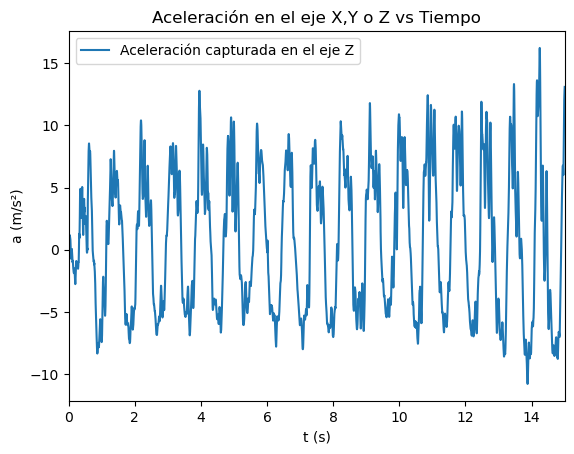

In [214]:
def leer_archivo(nombre_del_archivo, cabeza = 1, columnas = 2): #Por default una fila de encabezado y 2 columnas
    all_datos= [] #Lista para almacenar los datos
    with open(nombre_del_archivo) as csvfile: #Abre el documento con un apuntador
        datos_leidos = csv.reader(csvfile, delimiter = ",") #Lee todo el archivo con delimitador coma
        for renglon in datos_leidos: #Toma cada renglón delimitado por la coma
            all_datos.append(renglon) #Mete cada renglón como una lista dentro de la lista de todos los datos
        
    M_datos = len(all_datos[int(cabeza):]) #Cuenta cuántos DATOS (sin el encabezado) hay
    datos_numericos = zeros((M_datos,columnas)) #Crea un arreglo de n columnas con bajada de N_datos 

    for j in range(columnas): #Repite el proceso para cada una de las n columnas dadas
        for i in range(M_datos): #Por cada dato que hay en el archivo sin contar el encabezado...
            datos_numericos[i,j] = float(all_datos[i+int(cabeza)][j]) #En la fila j (fija) se agrega en (j,i) el dato
    return(datos_numericos) #Regresa un array de (N_datos x la cantidad de columnas)

dat = leer_archivo("Raw Data.csv", columnas = 4) #Lee el archivo capturado

""" 
La función toma el archivo con M+1 datos y N columnas (por default 2 columnas). Lee los datos y regresa un arreglo de 
M filas por N columnas, donde la columna J contiene en cada fila I un dato capturado.
"""

fig, ax = plt.subplots()
ax.set(title = 'Aceleración en el eje X,Y o Z vs Tiempo')
ax.set(xlabel = 't (s)', ylabel = 'a (m/s²)')
plot(dat[:,0], dat[:,3], label = "Aceleración capturada en el eje Z")
xlim([0,15])
legend()
show()



---


## Ejercicio 2: Derivación e integración numérica

### Derivación numérica hasta cuarto orden

En este ejercicio programamos un algoritmo que nos de la derivada numérica de una función cuyo dominio esté espaciado uniformemente por una distancia $h$. La estrategia a seguir es la siguiente:

<ul>
    <li>Utilizar la deducción para la derivada en un punto $f_i$ en el interior de la malla.<\li>
    <li>Programar la derivada para los puntos en el conjunto ${x_2,\dots,x_{x-2}}$</li>
    <li>Programar la derivada para los puntos faltantes del dominio</li>


In [144]:
def der_h4(x,f): #La función recibe una cantidad de puntos x y sus imágenes en f en forma de listas
    f_prima = zeros_like(f) #Creamos una lista con espacio para cada punto a derivar
    h = x[1] - x[0] #Definimos el espaciado uniforme de la malla x como. 
    for i in range(2,len(f)-2): #Calculamos la derivada para los puntos interiores y excluimos al segundo y penúltimo.
        f_prima[i] = (-f[i+2] + 8*f[i+1]-8*f[i-1] + f[i-2])/(12*h) #Fórmula calculada con Taylor
    
    #Ahora calculamos la derivada en los puntos faltantes con la dedución del sistema de ecuaciones
    f_prima[0] = (-25/12*f[0] + 4*f[1] - 3*f[2] +4/3*f[3] - 1/4*f[4])/h
    f_prima[1] = (-25/12*f[1] + 4*f[2] - 3*f[3] +4/3*f[4] - 1/4*f[5])/h
    f_prima[-1] = (-25/12*f[-1] + 4*f[-2] - 3*f[-3] +4/3*f[-4] - 1/4*f[-5])/(-h)
    f_prima[-2] = (-25/12*f[-2] + 4*f[-3] - 3*f[-4] +4/3*f[-5] - 1/4*f[-6])/(-h)
    
    return f_prima #Regresa la lista con la derivada numérica en cada punto


---

A continuación una función de prueba

---

In [132]:
x = linspace(0, 4*pi, 100) #Damos un dominio equiparticionado entre 0 y 4pi con 100 puntos
y = x*sin(x) # Creamos una lista con la función evaluada en cada punto del dominio
dy = sin(x)+x*cos(x) #Derivada analítica
der_h4 = der_h4(x,y) #Evaluación con la derivada numérica

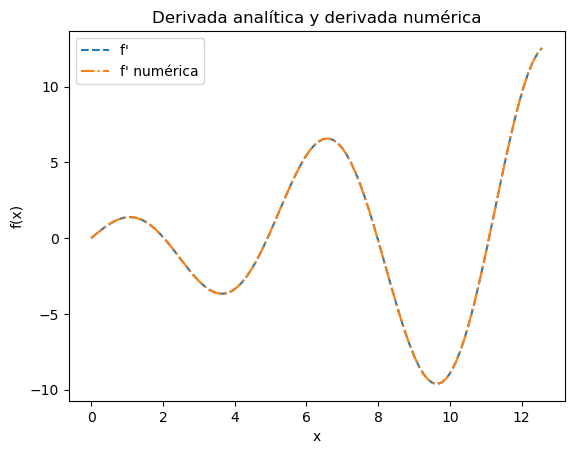

In [133]:
fig, ax = plt.subplots()
ax.set(title = 'Derivada analítica y derivada numérica')
ax.set(xlabel = 'x', ylabel = 'f(x)')
plot(x, dy, '--' , label = "f' ")
plot(x, der_h4, '-.', label = "f' numérica")
legend()
show()

### Integración numérica hasta cuarto orden

Ahora encontraremos la primitiva de una función hasta cuarto orden (inclusive) numéricamente.

In [176]:
def integra_h4(x,f): #Definición de la función. Recibe la malla equiespaciada y una malla del dominio evaluado.
    mod_f, int_f, h = len(f)%2, 0, x[1]-x[0] #Paridad de card(x), valor de la integral y paso.
    
    if mod_f == 0: #Si la malla tiene cardinalidad par b
        
        int_f += (-19/720*f[4]+53/360*f[3]-11/30*f[2]+323/360*f[1]+251/720*f[0]) #Calcula el primer intervalo
        
        for i in range(2,len(f)-3,2): #Calcula los intervalos intermedios
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2])
            
        int_f += -(-19/720*f[-6]+53/360*f[-5]-11/30*f[-4]+323/360*f[-3]+251/720*f[-2]) #Penúltimo intervalo
        int_f += -(-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]+251/720*f[-1]) #Último intervalo
        
    else: #Si no es par, es impar. Se calcula como sigue
        
        int_f += (-19/720*f[4]+53/360*f[1]-11/30*f[2]+323/360*f[1]-251/720*f[0]) #Calcula el primer intervalo igual
        
        for i in range(2,len(f)-2,2): #Calcula los intervalos intermedios dejando la última mitad libre
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2]) #El cálculo es el mismo
            
        #Para el último intervalo agregamos un punto artificial para utilizar la fórmula deducida previamente
        
        f.append(x[-1]+h)
        
        int_f += -(-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]+251/720*f[-1]) #Último intervalo igual
    
    return int_f * h

In [178]:
# PRUEBA CON EL CASO PAR Y EL CASO IMPAR.


x_par = linspace(0,2*pi,100)
x_impar = linspace(0,2*pi,101)

y_par = sin(x_par)**2
y_impar = sin(x_impar)**2

integral_par = integra_h4(x_par, y_par)
integral_impar = integra_h4(x_impar, y_impar)


print(integral_par, integral_impar)

3.140233617597315 3.141139095579652


In [179]:
#Primitiva

def primitiva(x, f):
    h = x[1] - x[0]
    
    if len(f) % 2 == 0: #Si el número de puntos en el dominio es par
        carddom = int(len(x)/2 + 1) #Calcula el número de puntos efectivos a obtener
        newx, F = zeros(carddom), zeros(carddom) #Listas para almacenar los valores
        
        #Cálculo del primer intervalo no simétrico
        F[0] = (-19/720*f[4]+53/360*f[3]-11/30*f[2]+323/360*f[1]-251/720*f[0])*h #Toma los primeros 4 vals de f
        
        for i in range(1, carddom - 2): #Calcula las áreas de los puntos intermedios
            j = int(2*i) #Define un contador auxiliar para saltar en el dominio original así: OxOxO
            F[i] = F[i-1] + (17/45*f[j+1] + 19/15*f[j]+17/45*f[j-1]-1/90*f[j-2])*h #Suma el área acumulada
            newx[i] = x[j] #Toma el punto del dominio que corresponde al punto calculado con f[j]
        
        print(F[-2], F[-3] )
        F[-2] = F[-3] + (-19/720*f[-6]+53/360*f[-5]-11/30*f[-4]+323/360*f[-3]-251/720*f[-2])*(-h) #Penúltimo valor
        F[-1] = F[-2] + (-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1])*(-h) #Último valor
        newx[-2], newx[-1], newx[0] = x[-2], x[-1], x[0] #Valores del nuevo dominio de los puntos especiales
        print(F[-1],F[-2], F[-3])

                    
        return newx, F #Regresa el nuevo dominio y los valores de F iterados multiplicados por h.
        
        
    else: #Si el número de puntos en el dominio es impar
        carddom = int((len(x)+1)/2) #Calcula el número de puntos efectivos a obtener
        newx, F = zeros(carddom), zeros(carddom)
        
        #Cálculo del primer intervalo no simétrico
        F[0] = (-19/720*f[4]+53/360*f[3]-11/30*f[2]+323/360*f[1]+251/720*f[0])*h #Toma los primeros 4 vals de f
        
        for i in range(1, carddom-1): #Calcula las áreas de los puntos intermedios
            j = int(2*i) #Define un contador auxiliar para saltar en el dominio original así: OxOxO
            F[i] = F[i-1] + (-1/90*f[j+2] + 17/45*f[j+1] + 19/15*f[j]+17/45*f[j-1]-1/90*f[j-2])*h #Suma el área acumulada
            newx[i] = x[j] #Toma el punto del dominio que corresponde al punto calculado con f[j]
        
        var = (-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]+251/720*f[-1]) # AQUÍ NO VEO POR QUÉ EL ÁREA ES POCA
        F[-1] = F[-2] + var*h #Último valor
        newx[-1], newx[0] = x[-1], x[0] #Valores del nuevo dominio de los puntos especiales
        
        return newx, F #Regresa el nuevo dominio y los valores de F iterados multiplicados por h.

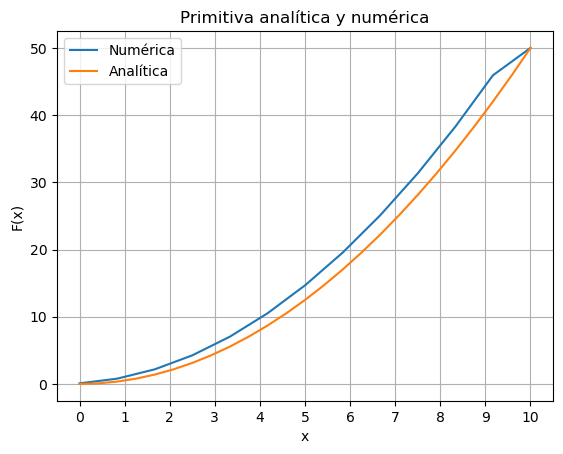

In [137]:
x = linspace(0, 10, 25) #Se da un dominio equiespaciado de 200 puntos entre 0 y 5
dom, prueba = primitiva(x,x) #Se calcula la primitiva con la función anterior

 

# Graficación
fig, ax = plt.subplots()
ax.set(title = 'Primitiva analítica y numérica')
ax.set(xlabel = 'x', ylabel = 'F(x)')
plot(dom, prueba, '-', label = 'Numérica') #Se da la primitiva numérica
plot(x,0.5*x**2, '-', label = 'Analítica') #Se da la primitiva analítica, que es sin(x)
legend()
grid()
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
show()


#Nótese que la numérica tiene puntos en la imagen mayores a 1 y eso está mal. Parece que hay cosas sumándose de más.

---

## Ejercicio 3: Comparación de errores

### Cálculo de la derivada numérica hasta segundo orden

En el siguiente bloque se encuentra el algoritmo para calcular la derivada de una función hasta segundo orden. Este fue trabajado durante la clase:

In [138]:
def deriv_h2(x,f):
    #Esto funciona si la malla es uniforme, pensando que todas las h son iguales. 
    f_prima = zeros_like(f) #Damos la misma cantidad de puntos que la función f
    h = x[1] - x[0] #Esta es la h que calcula todo el tiempo.
    for i in range(len(f)-1): #Restamos uno para dejar el último punto fuera
        f_prima[i] = (f[i+1]-f[i])
    f_prima[-1] = (f[-1]-f[-2]) #La división entre h mejor la hacemos al final
    return f_prima/h

En el siguiente bloque está el análisis de las funciones:

$$
f(x) = e^{-x^{2}}\sin{(10x)} \\
g(x) = -\frac{2}{x^{6}} + \frac{1}{x^{12}}
$$

Y sus primeras y segundas derivadas analíticas obtenidas con la calculadora: https://www.derivative-calculator.net/

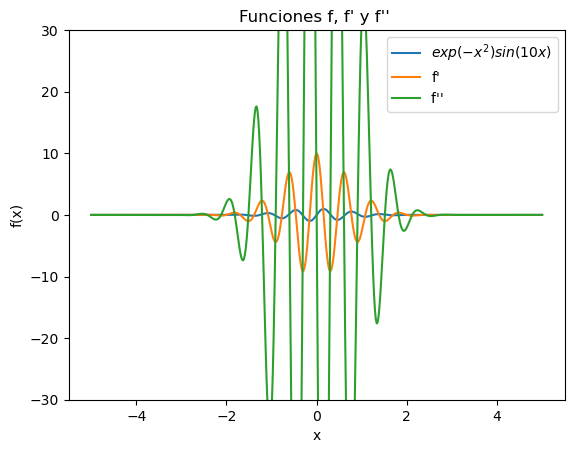

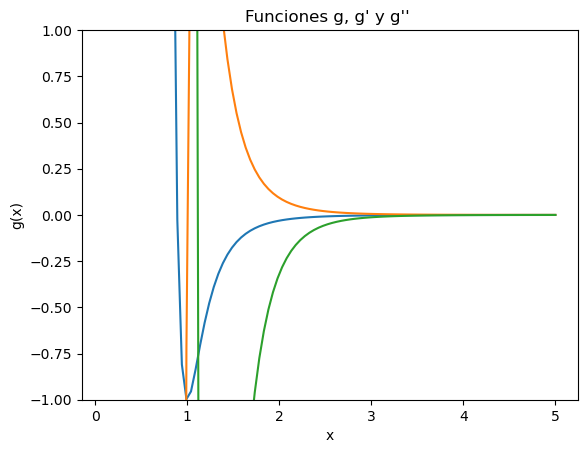

In [189]:
dom1= linspace(-5,5, 500) #Da el dominio con el número de puntos sujeto a modificación
x1 = dom1
f = exp(-x1**2)*sin(10*x1)
f_p = -exp(-x1**2)*(2*x1*sin(10*x1)-10*cos(10*x1))
f_2p = exp(-x1**2)*((4*x1**2-102)*sin(10*x1)-40*x1*cos(10*x1))

fig, ax = plt.subplots()
ax.set(title = "Funciones f, f' y f'' ")
ax.set(xlabel = "x", ylabel = "f(x)")
plot(x1, f, label = '$exp(-x^{2})sin(10x)$')
plot(x1, f_p, label = "f'")
plot(x1, f_2p, label = "f'' ")
ylim([-30,30])
legend()
show()

###------------------------- Segunda función -----------------------###

dom2 = linspace(0.1, 5, 100)
x2 = dom2
g = -2*x2**(-6) + 1*x2**(-12)
g_p = (12*x2**6-12)*x2**(-13)
g_2p = -(84*x2**6-156)*x2**(-14)


fig, ax = plt.subplots()
ax.set(title = "Funciones g, g' y g'' ")
ax.set(xlabel = "x", ylabel = "g(x)")
plot(x2, g, label = '-2x^{-6}+x^{-12}')
plot(x2, g_p, label = "g' ")
plot(x2, g_2p, label = "g'' ")
ylim([-1,1])
show()

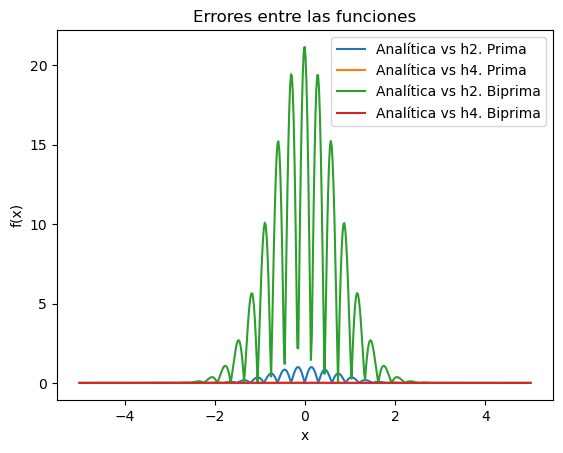

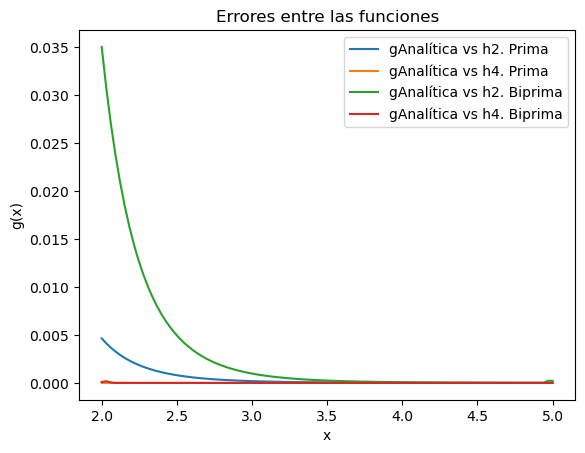

In [156]:
#Ahora calculamos los valores de las derivadas con el algoritmo visto en clase y el mío

#Se calculan los valores con la función dada en clase para f
f_p_h2 = deriv_h2(x1, f)
f_2p_h2 = deriv_h2(x1,f_p_h2)


f_p_h4 = der_h4(x1,f)
f_2p_h4 = der_h4(x1,f_p_h4)

dif_p_ANyH2 = abs(f_p - f_p_h2)
dif_p_ANyH4 = abs(f_p - f_p_h4)

dif_2p_ANyH2 = abs(f_2p - f_2p_h2)
dif_2p_ANyH4 = abs(f_2p - f_2p_h4)

#Se hace el análisis de la diferencia 

fig, ax = plt.subplots()
ax.set(title = "Errores entre las funciones")
ax.set(xlabel = "x", ylabel = "f(x)")
plot(x1, dif_p_ANyH2, label = 'Analítica vs h2. Prima')
plot(x1, dif_p_ANyH4, label = 'Analítica vs h4. Prima')
plot(x1, dif_2p_ANyH2, label = 'Analítica vs h2. Biprima')
plot(x1, dif_2p_ANyH4, label = 'Analítica vs h4. Biprima')
legend()
show()

####-------- Segunda función ----------------- ####

#Se calculan los valores con la función dada en clase para g
g_p_h2 = deriv_h2(x2, g)
g_2p_h2 = deriv_h2(x2,g_p_h2)
g_p_h4 = der_h4(x2,g)
g_2p_h4 = der_h4(x2,g_p_h4)

dif_p_ANyH2g = abs(g_p - g_p_h2)
dif_p_ANyH4g = abs(g_p - g_p_h4)

dif_2p_ANyH2g = abs(g_2p - g_2p_h2)
dif_2p_ANyH4g = abs(g_2p - g_2p_h4)

#Se hace el análisis de la diferencia 

fig, ax = plt.subplots()
ax.set(title = "Errores entre las funciones")
ax.set(xlabel = "x", ylabel = "g(x)")
plot(x2, dif_p_ANyH2g, label = 'gAnalítica vs h2. Prima')
plot(x2, dif_p_ANyH4g, label = 'gAnalítica vs h4. Prima')
plot(x2, dif_2p_ANyH2g, label = 'gAnalítica vs h2. Biprima')
plot(x2, dif_2p_ANyH4g, label = 'gAnalítica vs h4. Biprima')
legend()
show()




## Ejercicio 4: Cálculo de integrales

### Uso de la función de integral numérica programada en el ejercicio 2

En este ejercicio calculamos la integral numérica en los intervalos propuestos de las funciones escritas anteriormente.

---

## Ejercicio 5: Primitiva de los datos iniciales

### Velocidad integrando la aceleración

En este ejercicio obtenemos la velocidad a partir de la integración de la aceleración medida por el celular en cada eje espacial.

In [191]:
#Se utiliza el código programado en clase para el cálculo de la primitiva


def primitiva_v2(x,f):
    # Ojo esta funcion falta adaptarla a todos los puntos
    N , h = len(f) , x[1]-x[0]
    if N%2 == 1:
        print('primer caso')
        N_cut = int( (N-1)/2 +1 )
        x_c , F = zeros(N_cut) , zeros(N_cut)
        for i in range(N_cut):
            x_c[i] = x[2*i]
        for i in range(N_cut-1):
            F[i+1] += F[i] + f[2*i+2] + 4*f[2*i+1] + f[2*i]
    else:
        print('segundo caso')
        N_cut = int(N/2 +1)
        x_c , F = zeros(N_cut) , zeros(N_cut)
        x_c[0] , x_c[1] = x[0] , x[1]
        for i in range(1,N_cut-1):
            x_c[i+1] = x[2*i+1]
        F[1] = (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])*0.0625
        for i in range(1,N_cut-1):
            F[i+1] += F[i] + f[2*i+1] + 4*f[2*i] + f[2*i-1]
    return x_c , F*h/3



segundo caso


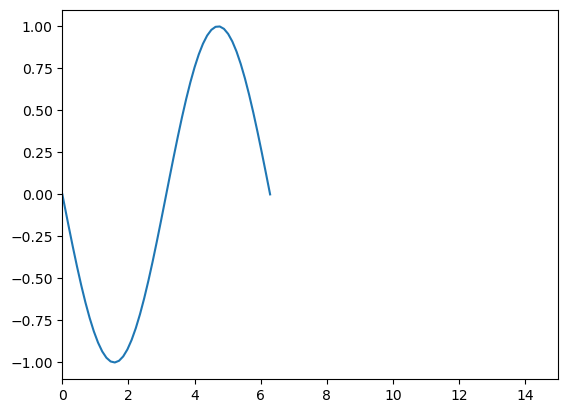

In [220]:
primdom, prim = primitiva_v2(linspace(0,2*pi,100), -cos(linspace(0,2*pi,100)))
plot(primdom,prim)
xlim([0,15])
show()